# Aula 1 - Python em Aplicações ambientais

Importar pandas para ler o arquivo .CSV

In [151]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
from scipy.stats import pearsonr

In [152]:
# Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()

print('Diretório atual: ' + cwd)


# Estabelecendo a pasta de dados que quero utilizar
dataPath = os.path.dirname(cwd) +'\\dados'
df = os.path.join(dataPath, 'PRcsv.csv')
df = pd.read_csv(df, encoding='latin1')
print('Diretório de dados:' + dataPath)


Diretório atual: C:\Users\marcos perrude\Documents\ENS410064\scripts
Diretório de dados:C:\Users\marcos perrude\Documents\ENS410064\dados


In [153]:
df['Valor'] = df['Valor'].replace(['insufic'], np.nan)
df['Valor'] = df['Valor'].astype('float')

df['datetime'] = pd.to_datetime(df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')
df = df.set_index("datetime")

df_PR012= df.query('Codigo == "PR_012"')

In [154]:
for poluente in df_PR012['Poluente'].unique():
    unidades = df_PR012[df_PR012['Poluente'] == poluente]['Unidade'].unique()
    print(f'Poluente: {poluente}, Unidade: {unidades}')


Poluente: CO, Unidade: ['ppm']
Poluente: NO2, Unidade: ['ppb']
Poluente: PM25, Unidade: ['µg/m3']
Poluente: PM10, Unidade: ['µg/m3']


In [155]:
#Separar por poluente
df_co = df_PR012.query('Poluente =="CO"')
df_no2 = df_PR012.query('Poluente =="NO2"')
df_pm10 = df_PR012.query('Poluente == "PM10"')
df_PM25 = df_PR012.query('Poluente == "PM25"')

data = [
    (df_co, 'Concentração CO', 'Concentração (ppm)', 9, 'blue'),
    (df_no2, 'Concentração NO2', 'Concentração (ug)', 102.79, 'brown'),
    (df_pm10, 'Concentração PM10', 'Concentração (µg/m³)', 45, 'black'),
    (df_PM25, 'Concentração PM2.5', 'Concentração (µg/m³)', 15, 'green')
]

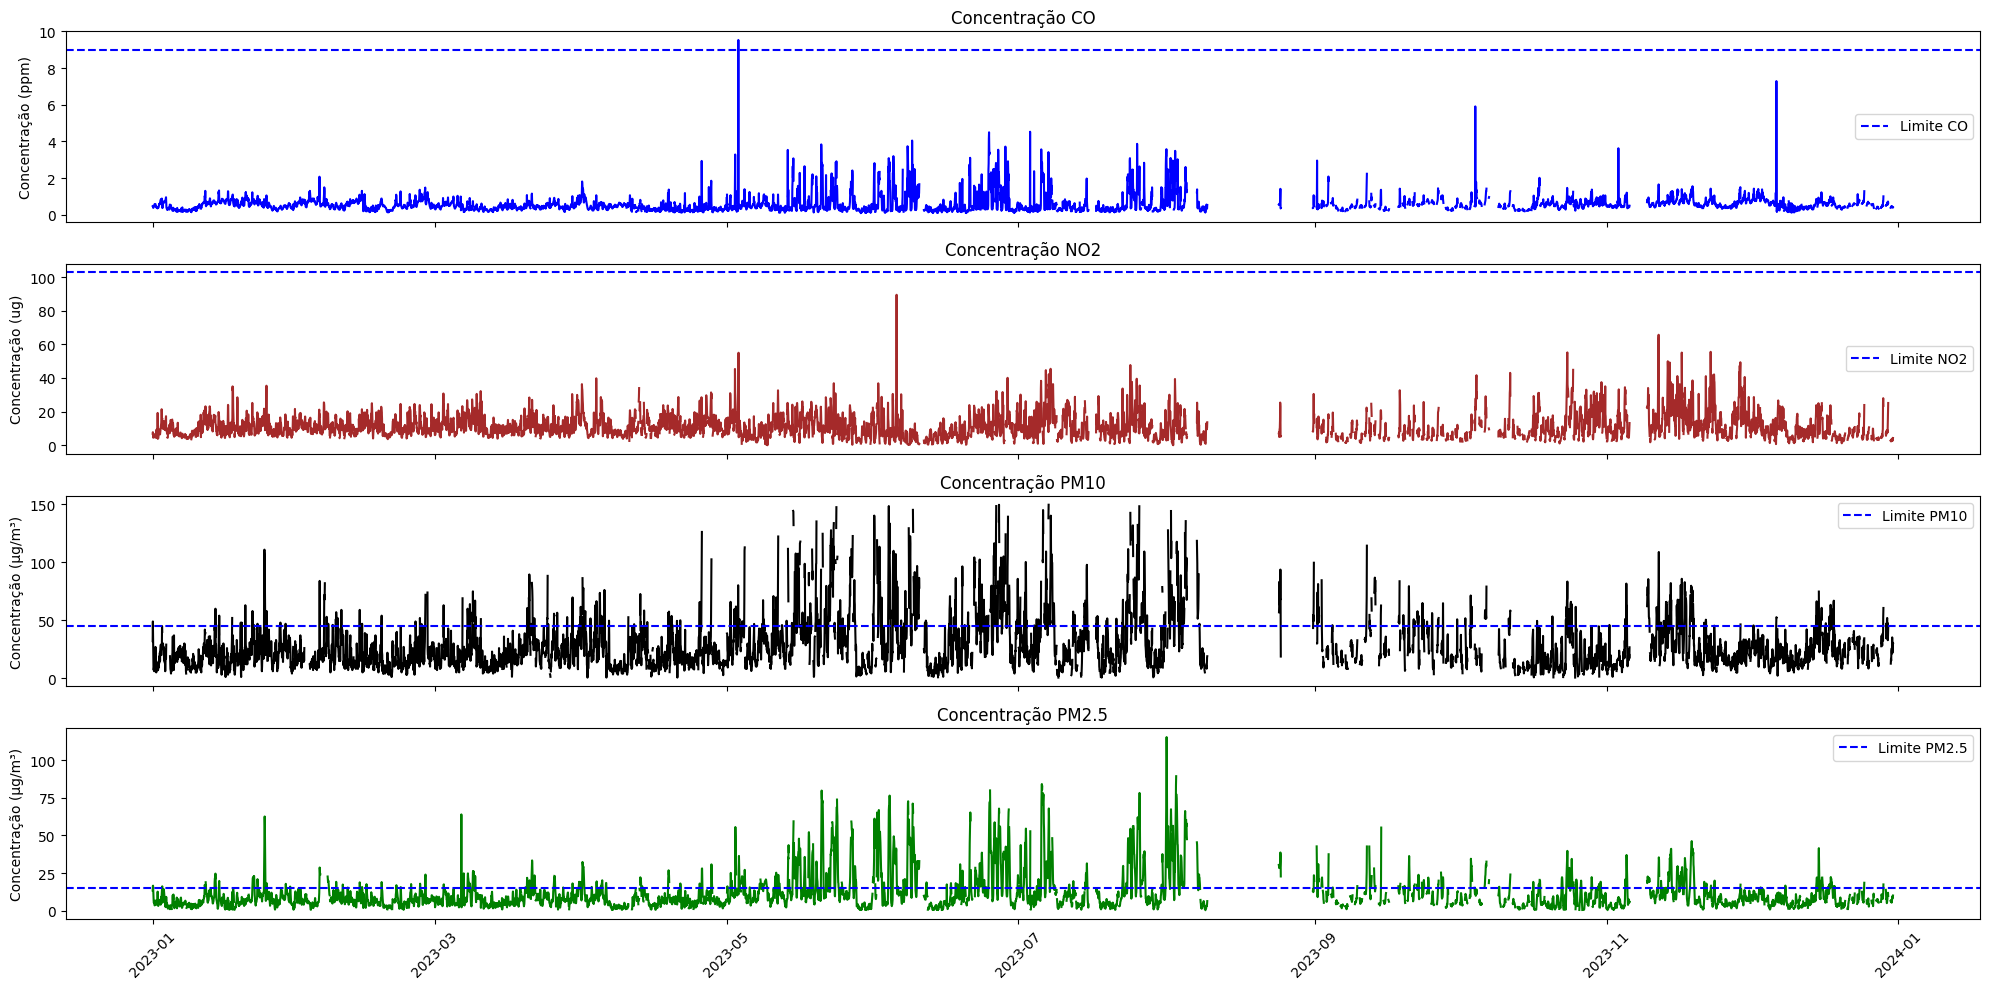

In [156]:
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 10))

for i, (df, title, ylabel, limite, color) in enumerate(data):
    ax[i].plot(df.index, df['Valor'], color=color)
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {title.split()[1]}')
    ax[i].set_title(title)
    ax[i].set_ylabel(ylabel)
    ax[i].legend()

ax[3].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\ATV3\dados_diarios.png")
plt.show()


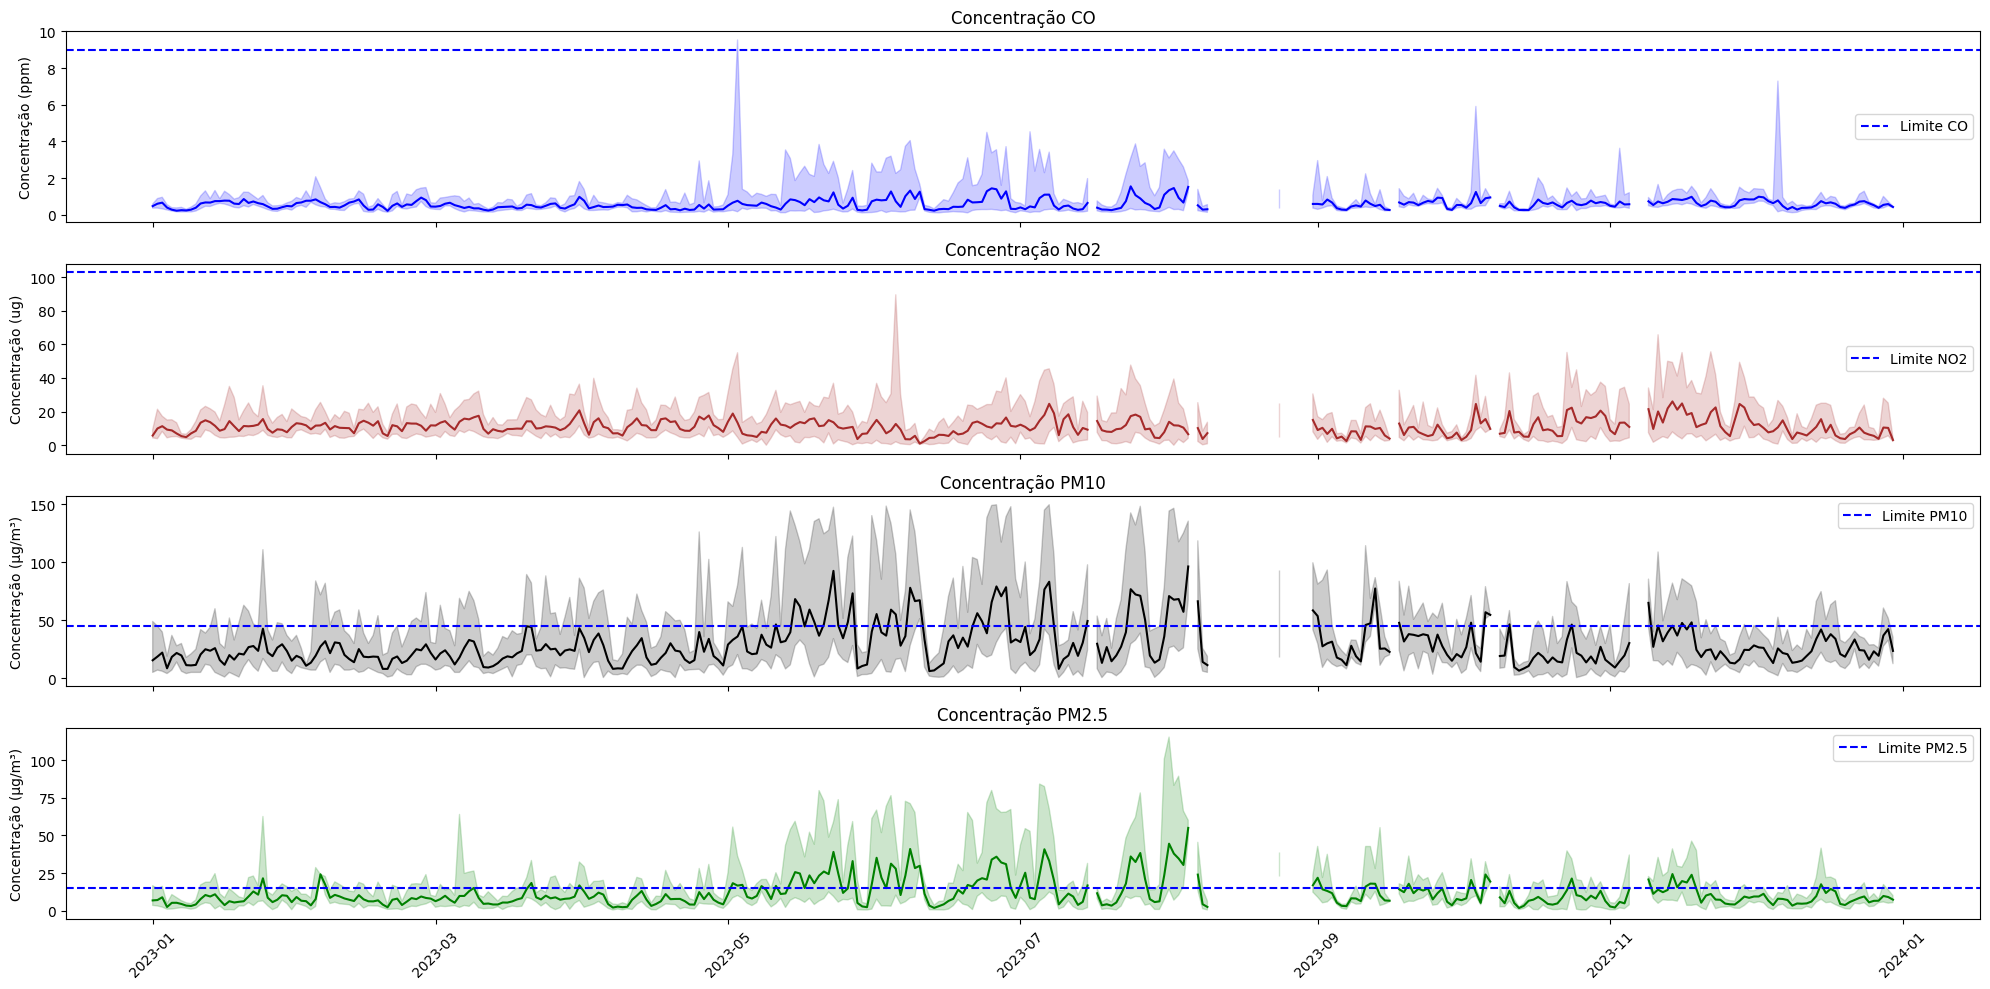

In [157]:
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 10))

for i, (Poluentes, title, ylabel, limite, color) in enumerate(data):
    media_diaria = Poluentes['Valor'].resample('D').mean()
    min_diaria = Poluentes['Valor'].resample('D').min()
    max_diaria = Poluentes['Valor'].resample('D').max()
    ax[i].plot(media_diaria.index, media_diaria, color=color)
    ax[i].fill_between(media_diaria.index, min_diaria, max_diaria, color=color, alpha=0.2)
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {title.split()[1]}')
    ax[i].set_title(title)
    ax[i].set_ylabel(ylabel)
    ax[i].legend()
    
ax[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\ATV3\dados_mensais.png")
plt.show()

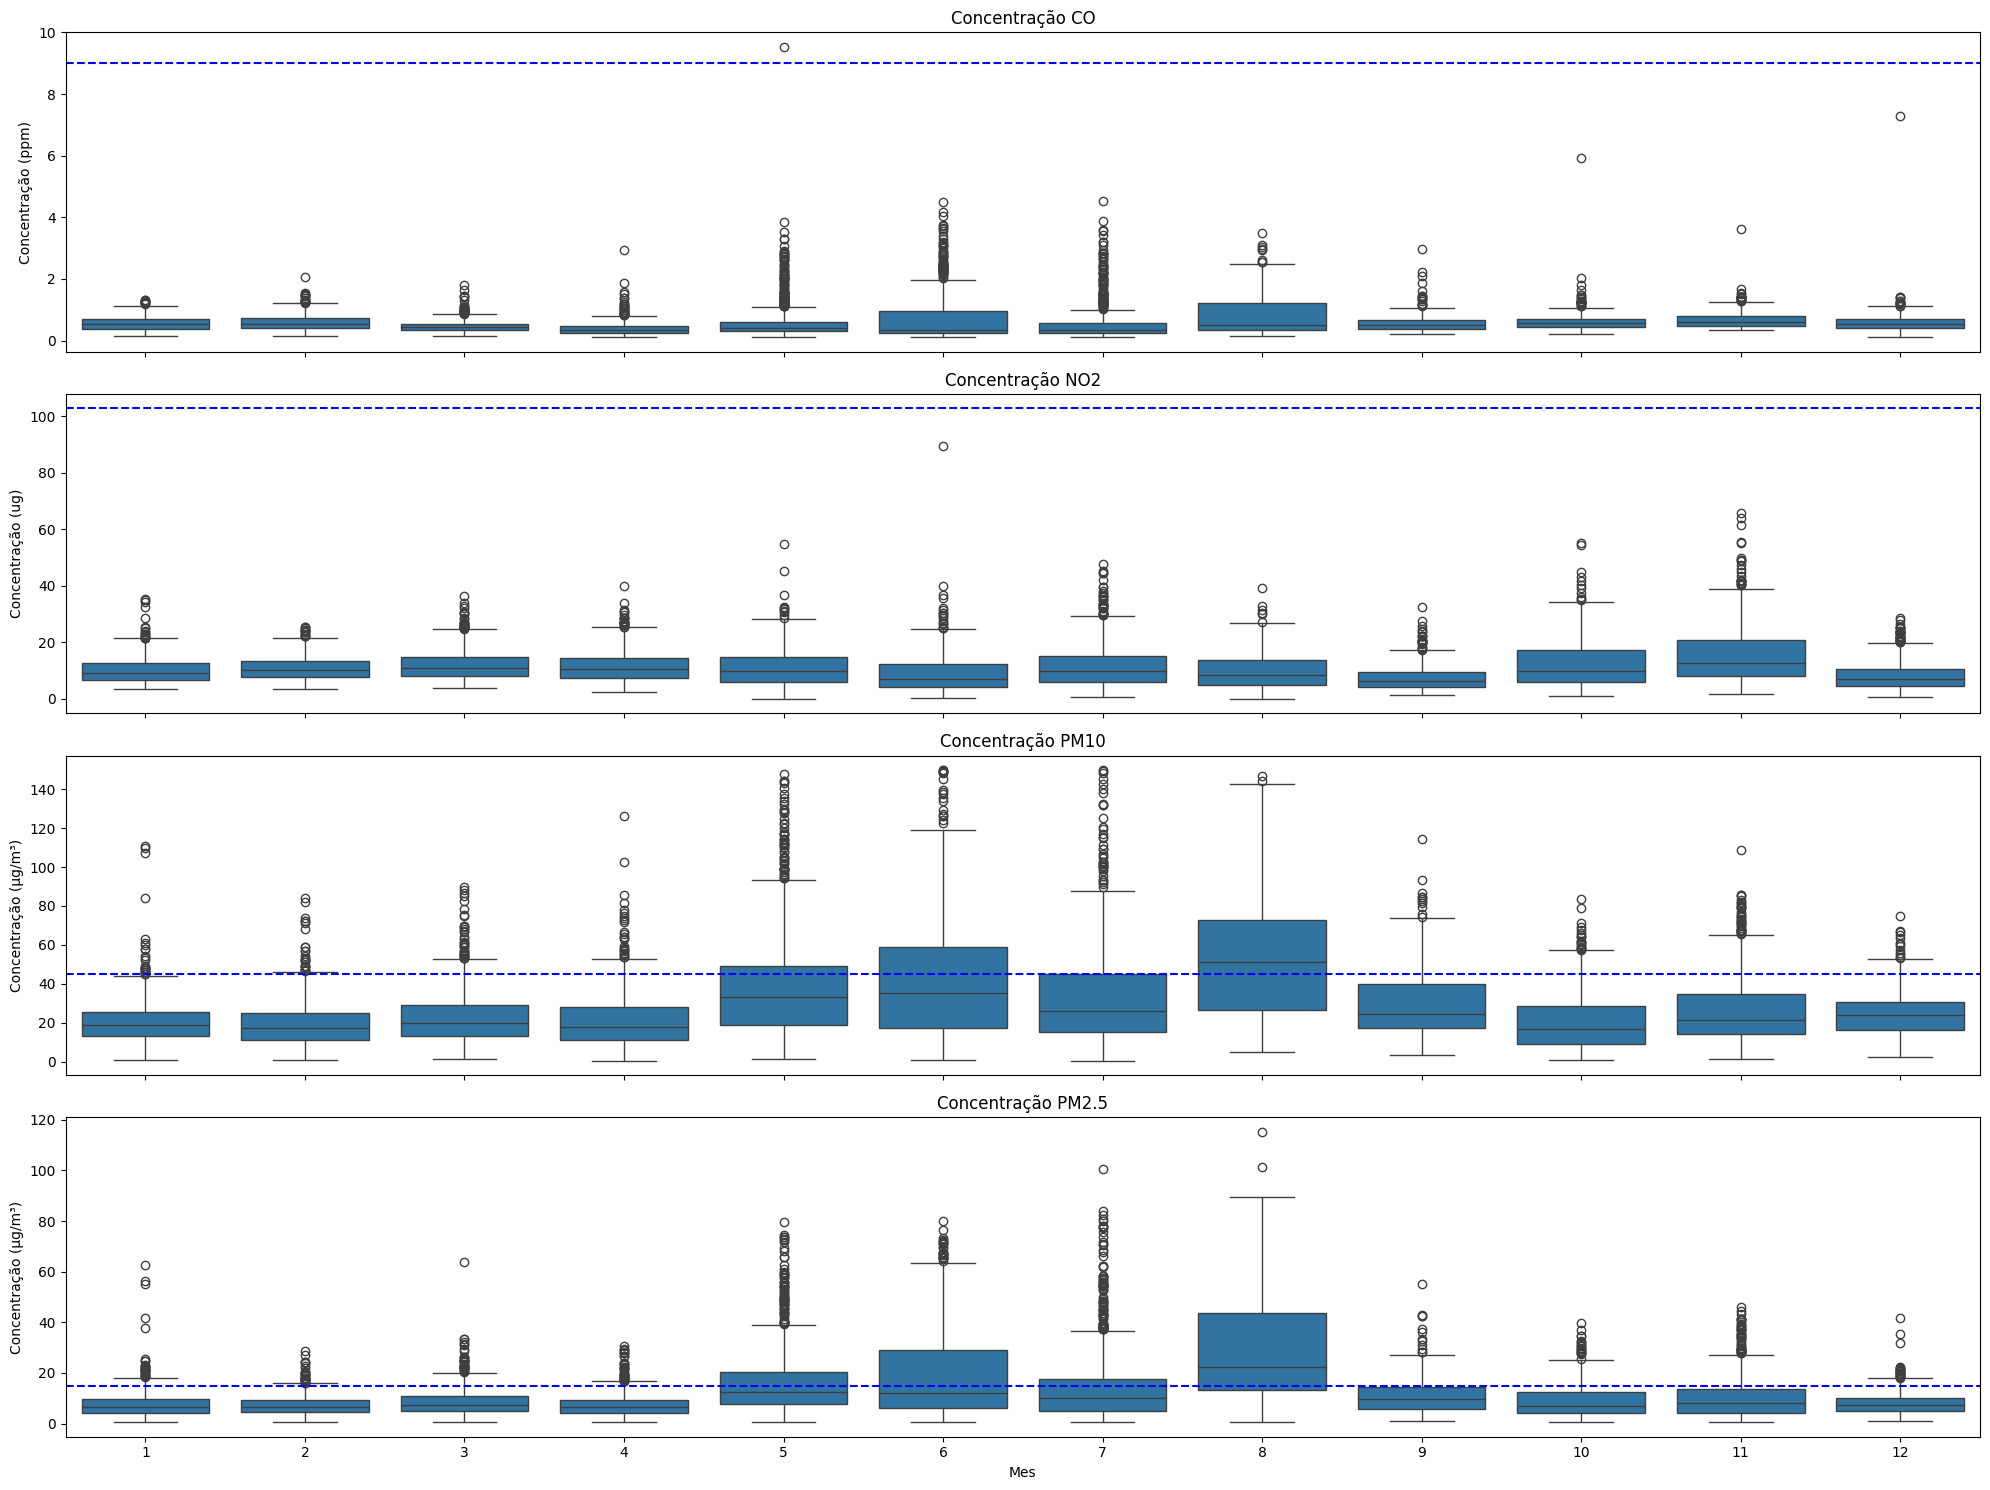

In [158]:
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 15))
for i, (df, title, ylabel, limite, color) in enumerate(data):
    sns.boxplot(x='Mes', y='Valor', data=df, ax=ax[i])
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {title.split()[1]}')
    ax[i].set_title(title) 
    ax[i].set_ylabel(ylabel)

plt.tight_layout()
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\ATV3\boxplot_mesal.png")
plt.show()

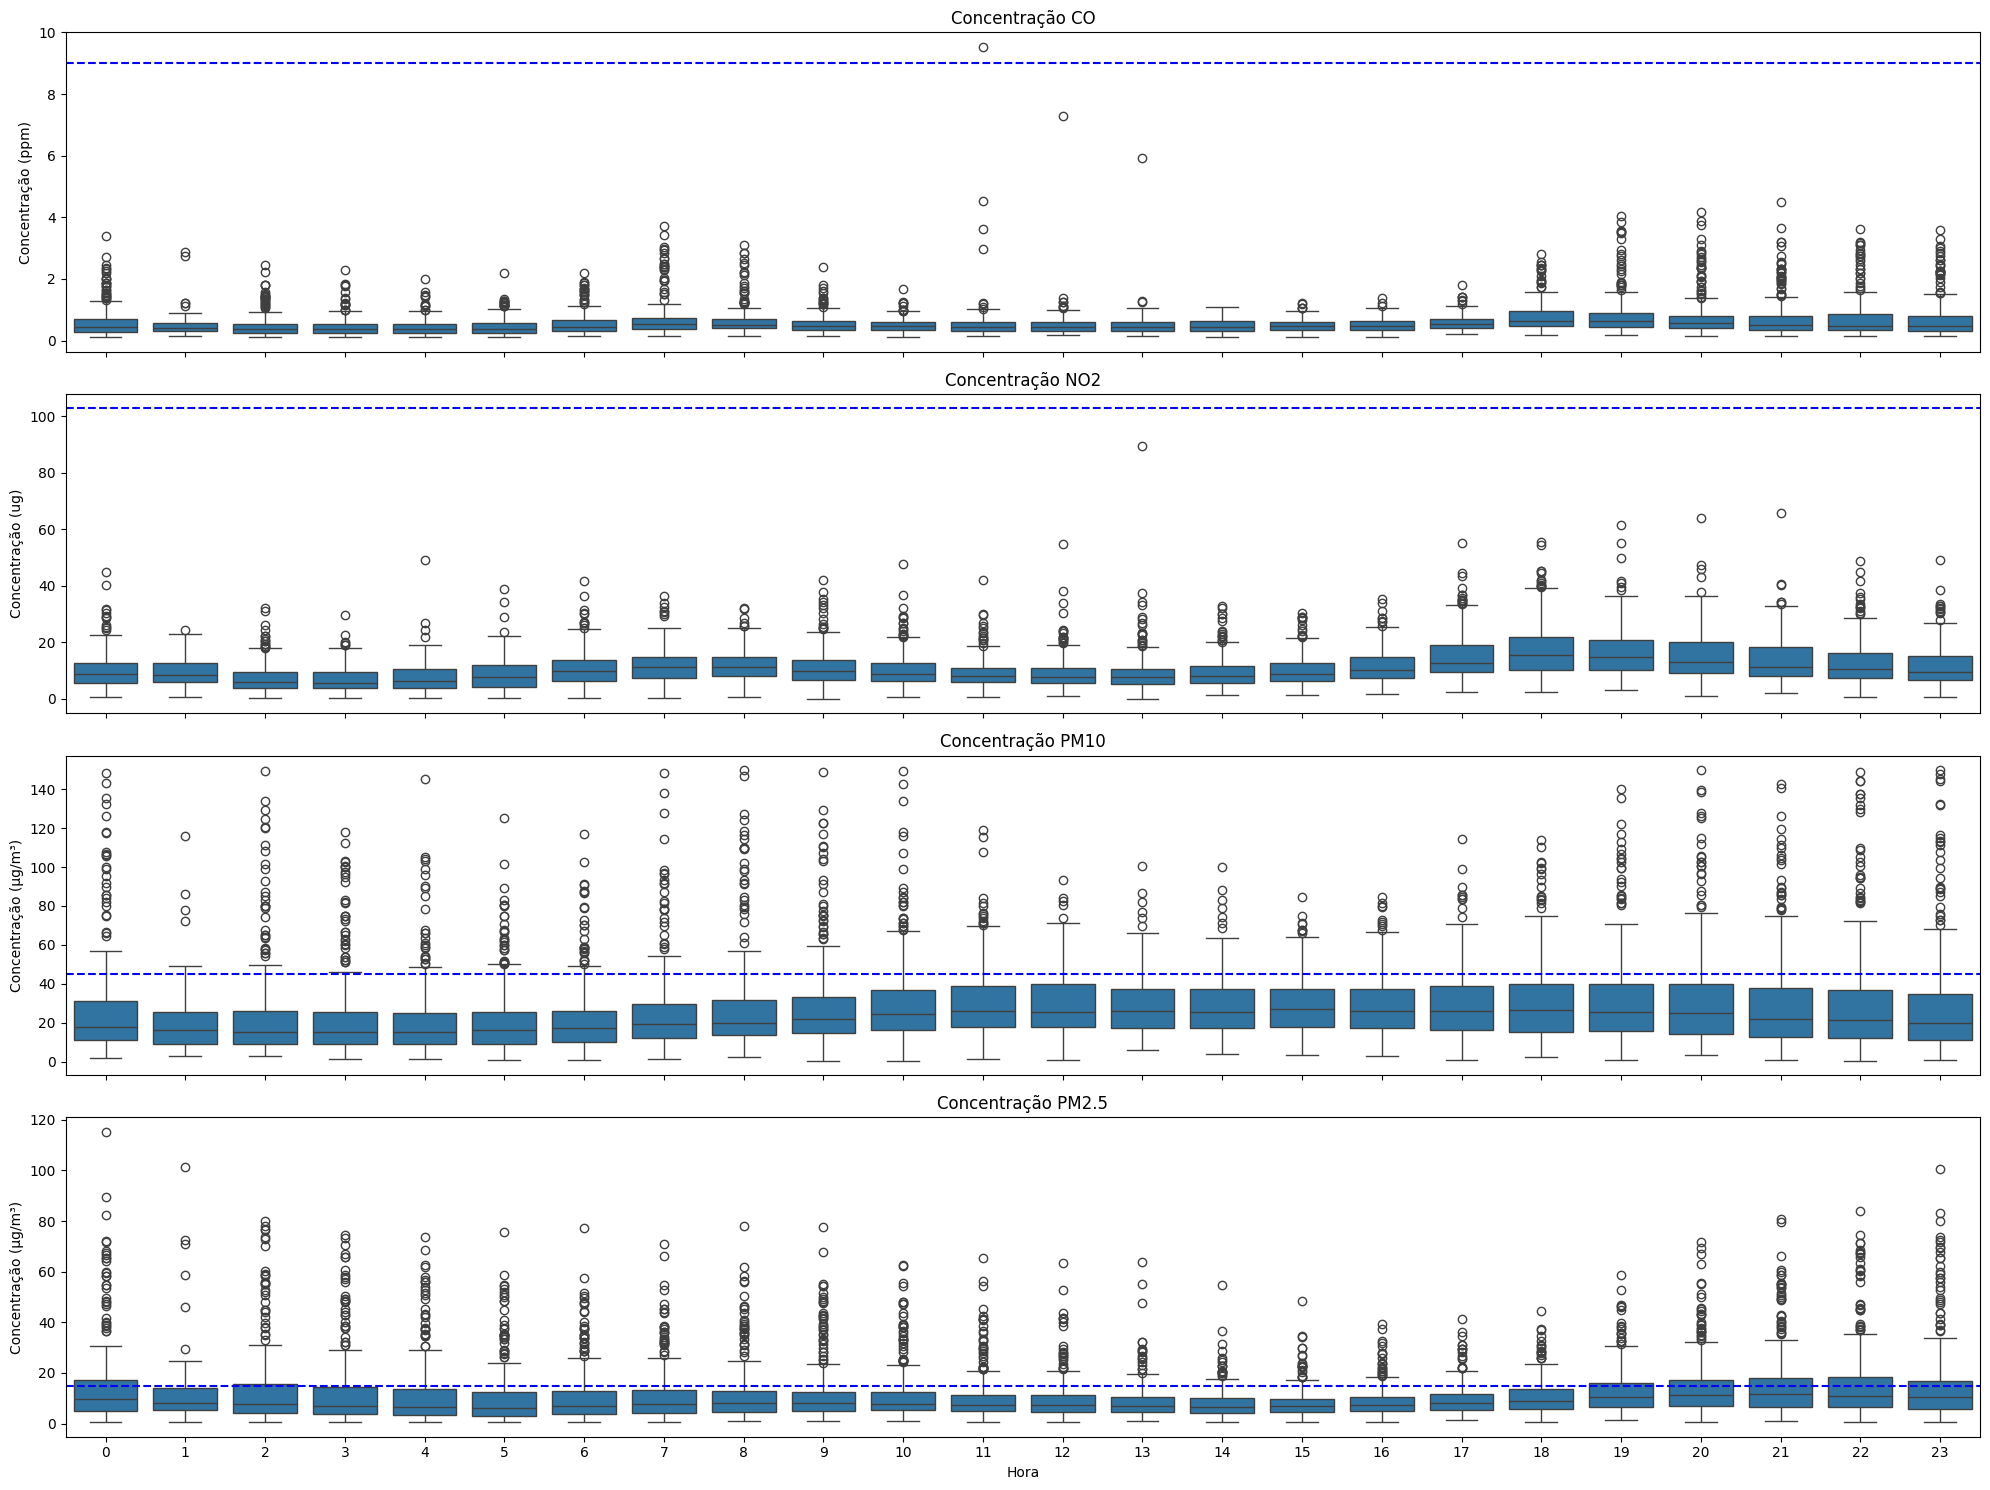

In [159]:
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 15))
for i, (df, title, ylabel, limite, color) in enumerate(data):
    sns.boxplot(x='Hora', y='Valor', data=df, ax=ax[i])
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {title.split()[1]}')
    ax[i].set_title(title) 
    ax[i].set_ylabel(ylabel)

plt.tight_layout()
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\ATV3\boxplot_hora.png")
plt.show()

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_50408\2050430200.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estacao_ano'] = df['Mes'].apply(determinar_estacao)
C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_50408\2050430200.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estacao_ano'] = df['Mes'].apply(determinar_estacao)
C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_50408\2050430200.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

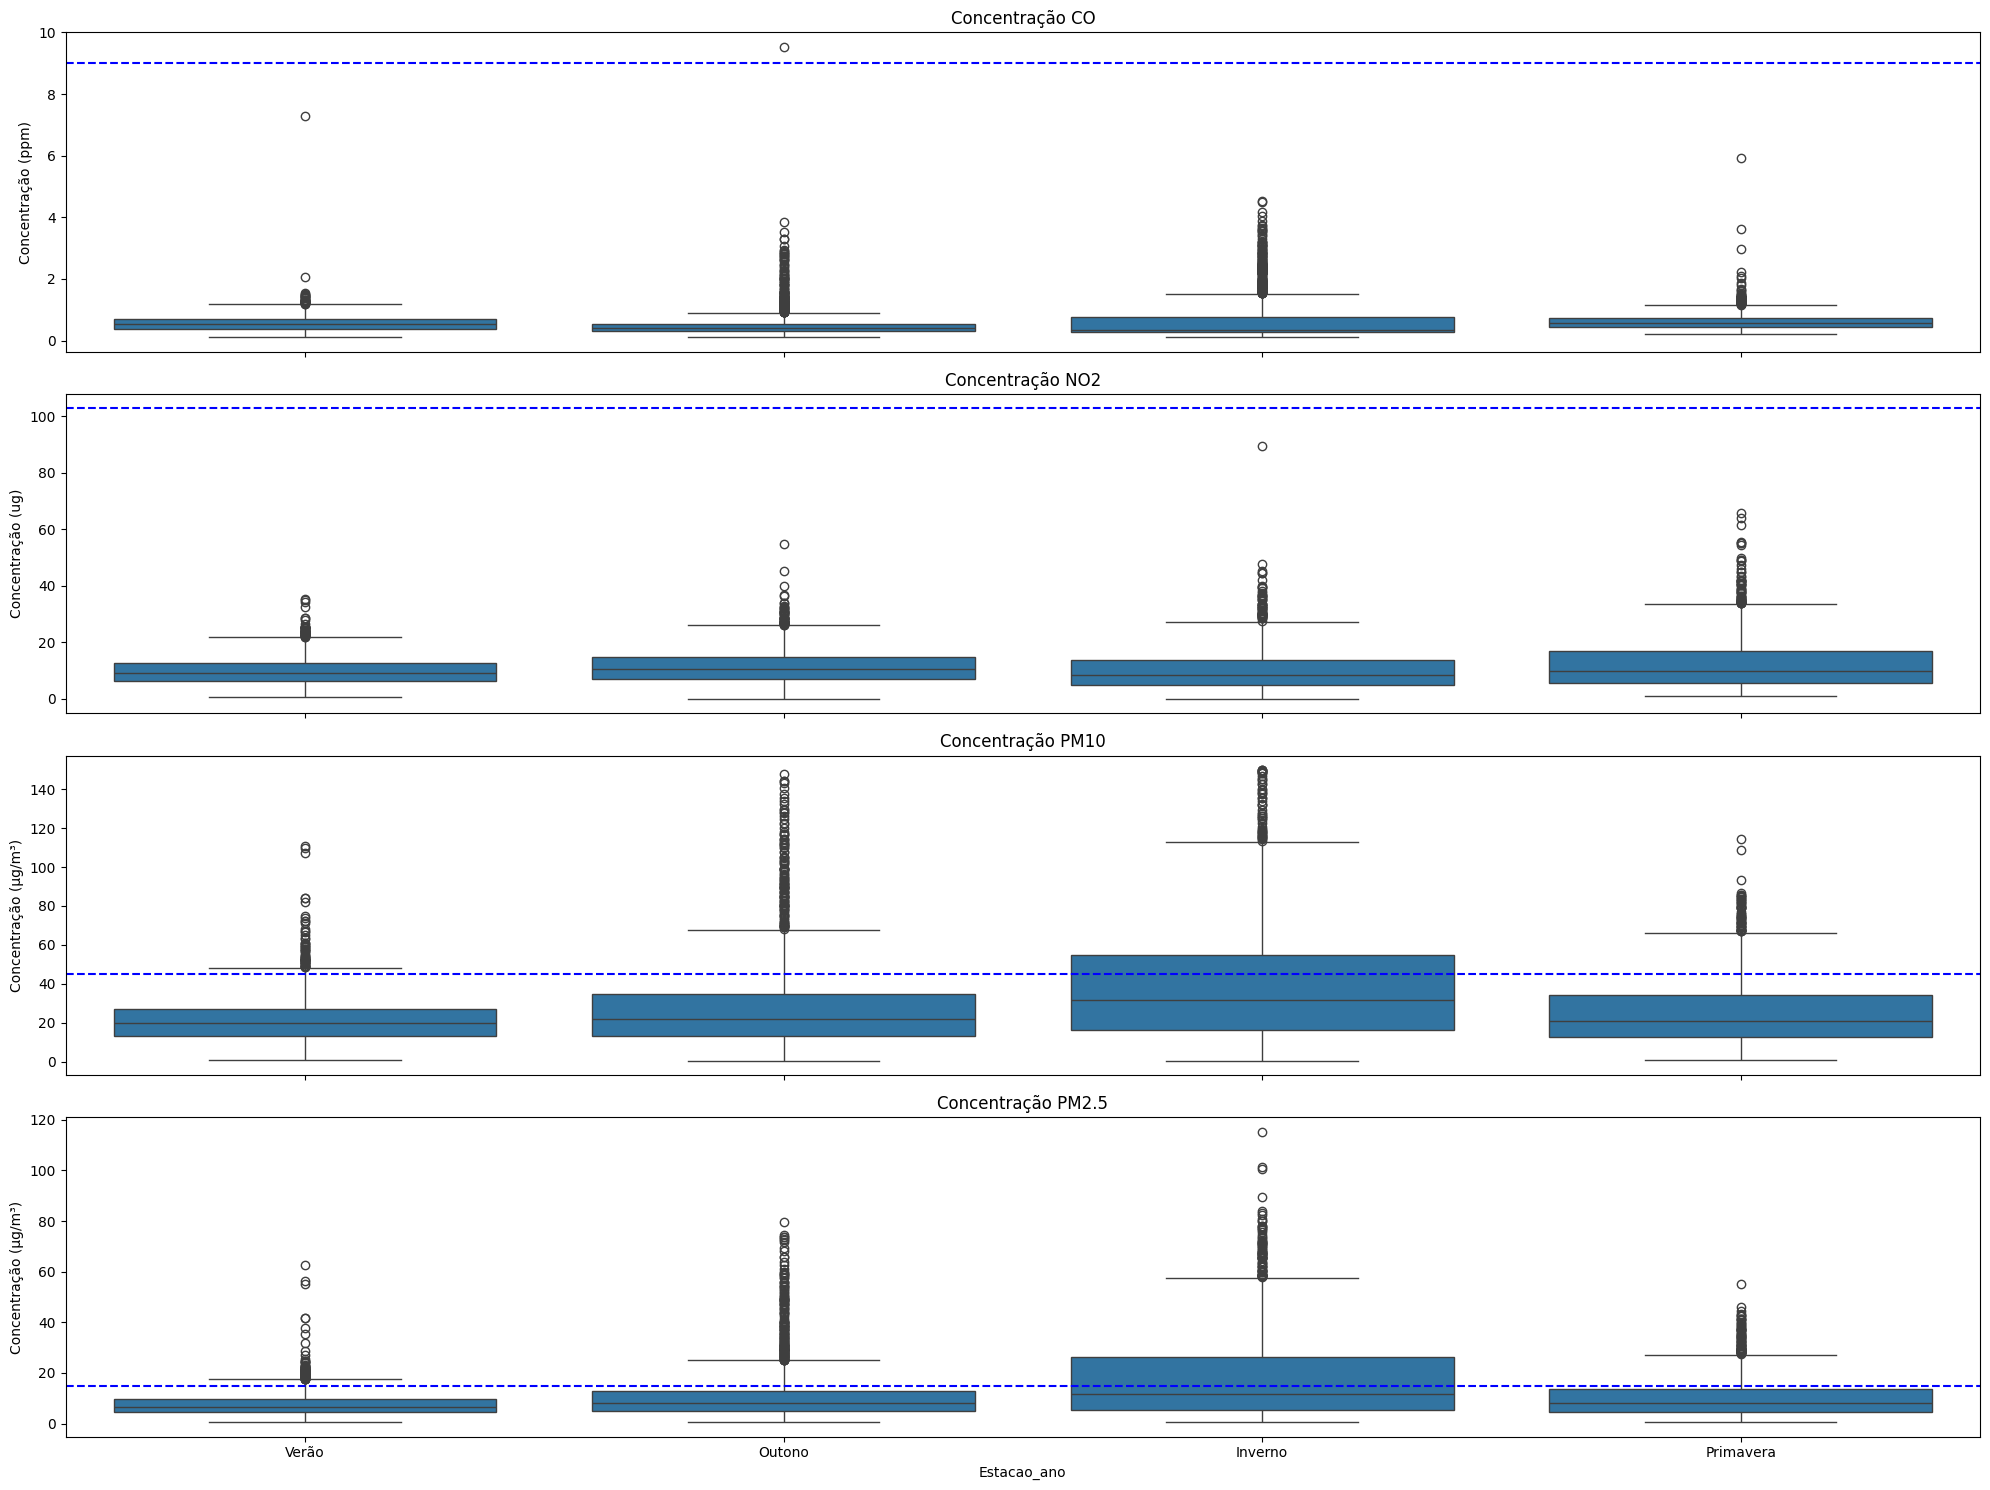

In [160]:
def determinar_estacao(Mes):
    if Mes in [12, 1, 2]:
        return 'Verão'
    elif Mes in [3, 4, 5]:
        return 'Outono'
    elif Mes in [6, 7, 8]:
        return 'Inverno'
    elif Mes in [9, 10, 11]:
        return 'Primavera'

fig, ax = plt.subplots(4, sharex=True, figsize=(20, 15))
for i, (df, title, ylabel, limite, color) in enumerate(data):
    df['Estacao_ano'] = df['Mes'].apply(determinar_estacao)
    sns.boxplot(x='Estacao_ano', y='Valor', data=df, ax=ax[i])
    ax[i].axhline(y=limite, color='blue', linestyle='--', label=f'Limite {title.split()[1]}')
    ax[i].set_title(title) 
    ax[i].set_ylabel(ylabel)

plt.tight_layout()
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\ATV3\boxplot_estacao.png")
plt.show()

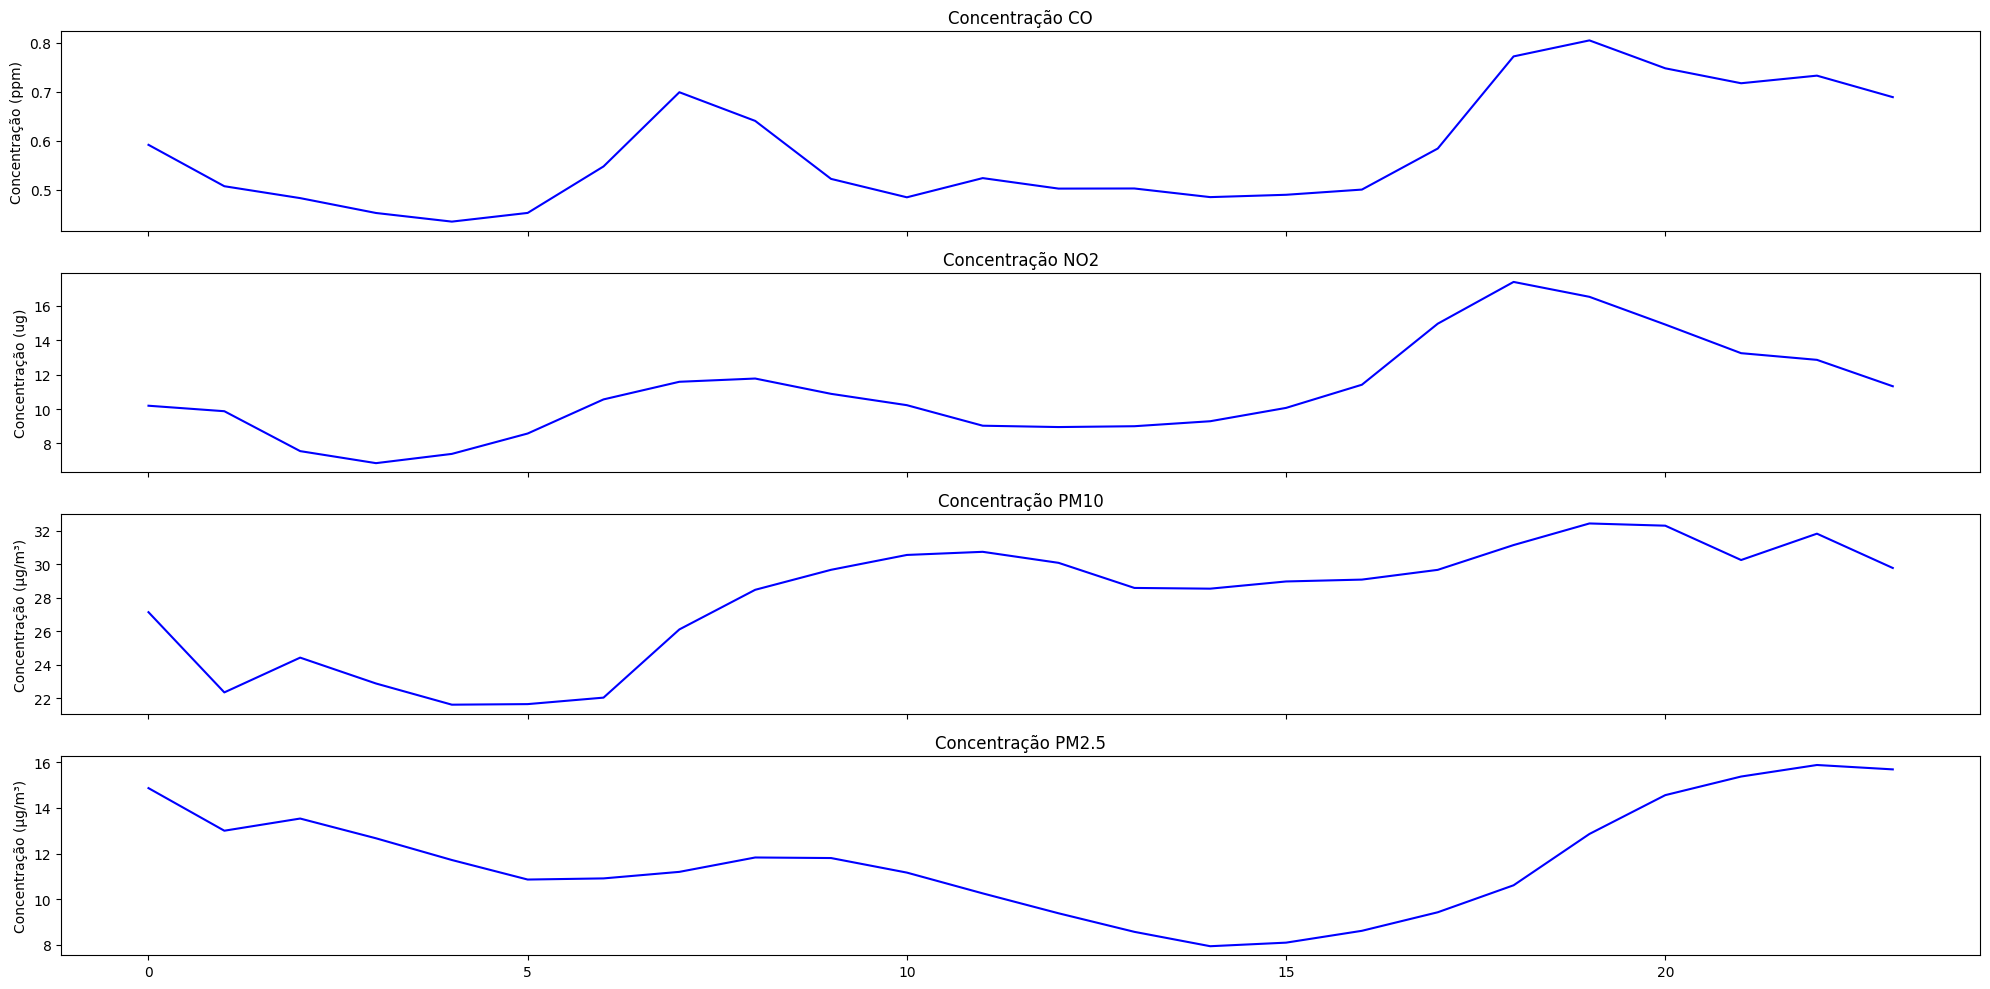

,Hora,count,mean,std,min,25%,50%,75%,max,Poluente
0,0,277.0,0.591733,0.507635,0.13,0.2800,0.430,0.6900,3.38,Concentração CO
1,1,100.0,0.507100,0.402302,0.14,0.2975,0.425,0.5800,2.89,Concentração CO
2,2,277.0,0.482780,0.364800,0.11,0.2600,0.380,0.5500,2.45,Concentração CO
3,3,277.0,0.452383,0.305873,0.12,0.2600,0.380,0.5400,2.30,Concentração CO
4,4,276.0,0.434746,0.269126,0.11,0.2475,0.380,0.5400,2.00,Concentração CO
...,...,...,...,...,...,...,...,...,...,...
91,19,325.0,12.856892,9.233939,1.50,6.3400,10.430,16.1000,58.83,Concentração PM2.5
92,20,324.0,14.558117,11.700221,0.72,7.0025,11.450,17.1600,71.73,Concentração PM2.5
93,21,322.0,15.373292,13.721819,0.89,6.3500,11.610,17.8475,80.69,Concentração PM2.5
94,22,273.0,15.878718,15.720936,0.52,6.4500,11.030,18.3500,84.12,Concentração PM2.5


In [161]:
resultados_hora = [] 

fig, ax = plt.subplots(4, sharex=True, figsize=(20, 10))
for i, (df, title, ylabel, limite, color) in enumerate(data):
    descricao_horaria = df.groupby('Hora')['Valor'].describe().reset_index()
    descricao_horaria['Poluente'] = title  
    resultados_hora.append(descricao_horaria) 
    ax[i].plot(descricao_horaria['Hora'], descricao_horaria['mean'], label='Média', color='blue')
    ax[i].set_title(title)  
    ax[i].set_ylabel(ylabel) 

plt.tight_layout() 
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\ATV3\media_hora.png")
plt.show()

df_resultado_hora = pd.concat(resultados_hora, ignore_index=True)

df_resultado_hora.to_csv(dataPath + '\\resultado_hora.csv', index=False)
df_resultado_hora


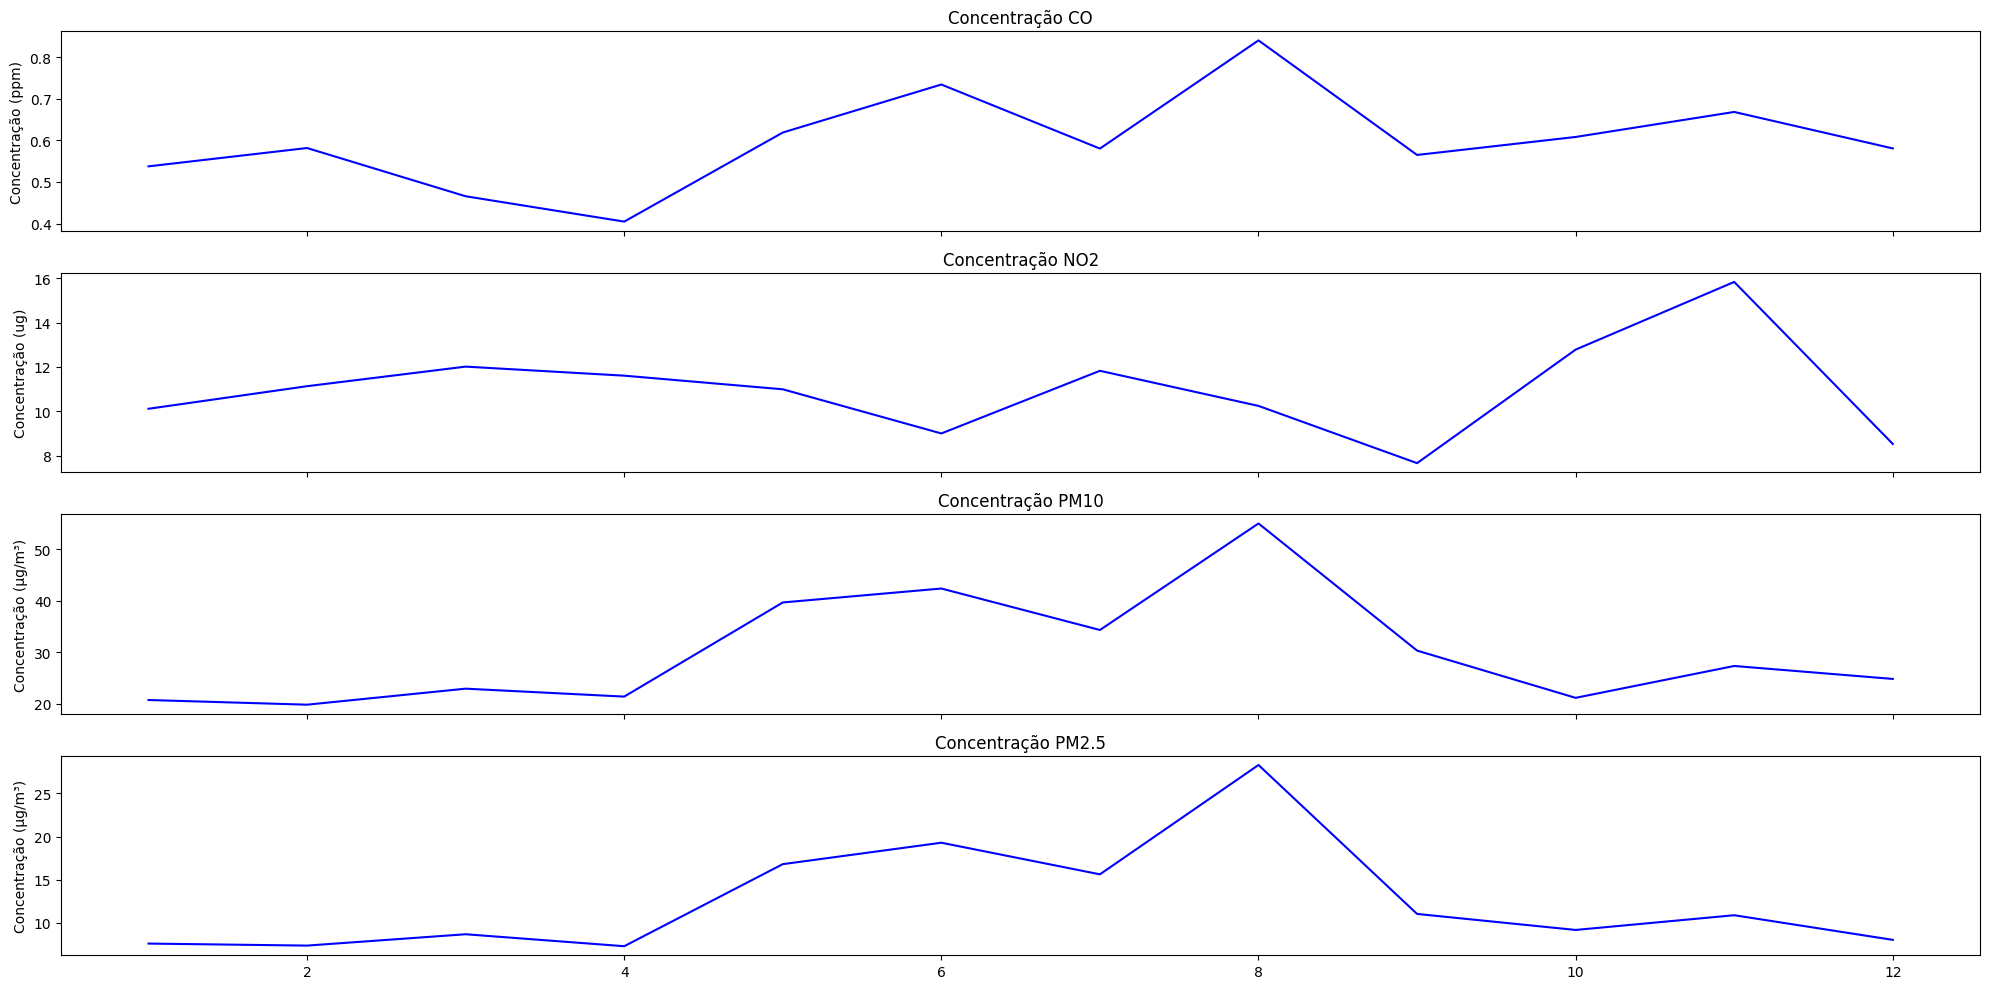

,Mes,count,mean,std,min,25%,50%,75%,max,Poluente
0,1,738.0,0.537439,0.220838,0.16,0.3625,0.530,0.6900,1.33,Concentração CO
1,2,672.0,0.581473,0.256092,0.14,0.4100,0.540,0.7325,2.08,Concentração CO
2,3,733.0,0.465593,0.197280,0.15,0.3400,0.430,0.5500,1.82,Concentração CO
3,4,685.0,0.404715,0.227115,0.13,0.2600,0.360,0.4800,2.94,Concentração CO
4,5,713.0,0.618668,0.651951,0.11,0.3000,0.420,0.6200,9.53,Concentração CO
5,6,667.0,0.733958,0.779301,0.11,0.2600,0.350,0.9500,4.50,Concentração CO
6,7,669.0,0.580090,0.618631,0.13,0.2600,0.350,0.5700,4.53,Concentração CO
7,8,168.0,0.839940,0.737096,0.14,0.3575,0.500,1.2125,3.49,Concentração CO
8,9,357.0,0.564790,0.306508,0.20,0.3800,0.500,0.6700,2.96,Concentração CO
9,10,529.0,0.608015,0.339629,0.20,0.4300,0.580,0.7000,5.91,Concentração CO


In [162]:
resultados_mes = [] 

fig, ax = plt.subplots(4, sharex=True, figsize=(20, 10))

for i, (df, title, ylabel, limite, color) in enumerate(data):
    descricao_horaria = df.groupby('Mes')['Valor'].describe().reset_index()
    descricao_horaria['Poluente'] = title  
    resultados_mes.append(descricao_horaria) 
    ax[i].plot(descricao_horaria['Mes'], descricao_horaria['mean'], label='Média', color='blue')
    ax[i].set_title(title)  
    ax[i].set_ylabel(ylabel) 

plt.tight_layout() 
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\ATV3\media_mes.png")
plt.show()

df_resultado_mes = pd.concat(resultados_mes, ignore_index=True)
df_resultado_hora.to_csv(dataPath + '\\resultado_mes.csv', index=False)
df_resultado_mes


Análise 
 Concentração CO Mann_Kendall_Test(trend='increasing', h=np.True_, p=np.float64(0.005513299292048801), z=np.float64(2.775405064734124), Tau=np.float64(0.10133177900240214), s=np.float64(5737.0), var_s=np.float64(4271353.666666667), slope=np.float64(0.0003098679343256012), intercept=np.float64(0.48663783920721204))
Análise 
 Concentração NO2 Mann_Kendall_Test(trend='no trend', h=np.False_, p=np.float64(0.22902742675678622), z=np.float64(-1.2028679444922512), Tau=np.float64(-0.04392751165748198), s=np.float64(-2487.0), var_s=np.float64(4271361.666666667), slope=np.float64(-0.0027001132496828023), intercept=np.float64(10.935702359280045))
Análise 
 Concentração PM10 Mann_Kendall_Test(trend='increasing', h=np.True_, p=np.float64(0.005116670988176697), z=np.float64(2.7995953044377173), Tau=np.float64(0.10221492157693939), s=np.float64(5787.0), var_s=np.float64(4271361.666666667), slope=np.float64(0.017230302053989177), intercept=np.float64(21.188225921596484))
Análise 
 Concentraçã

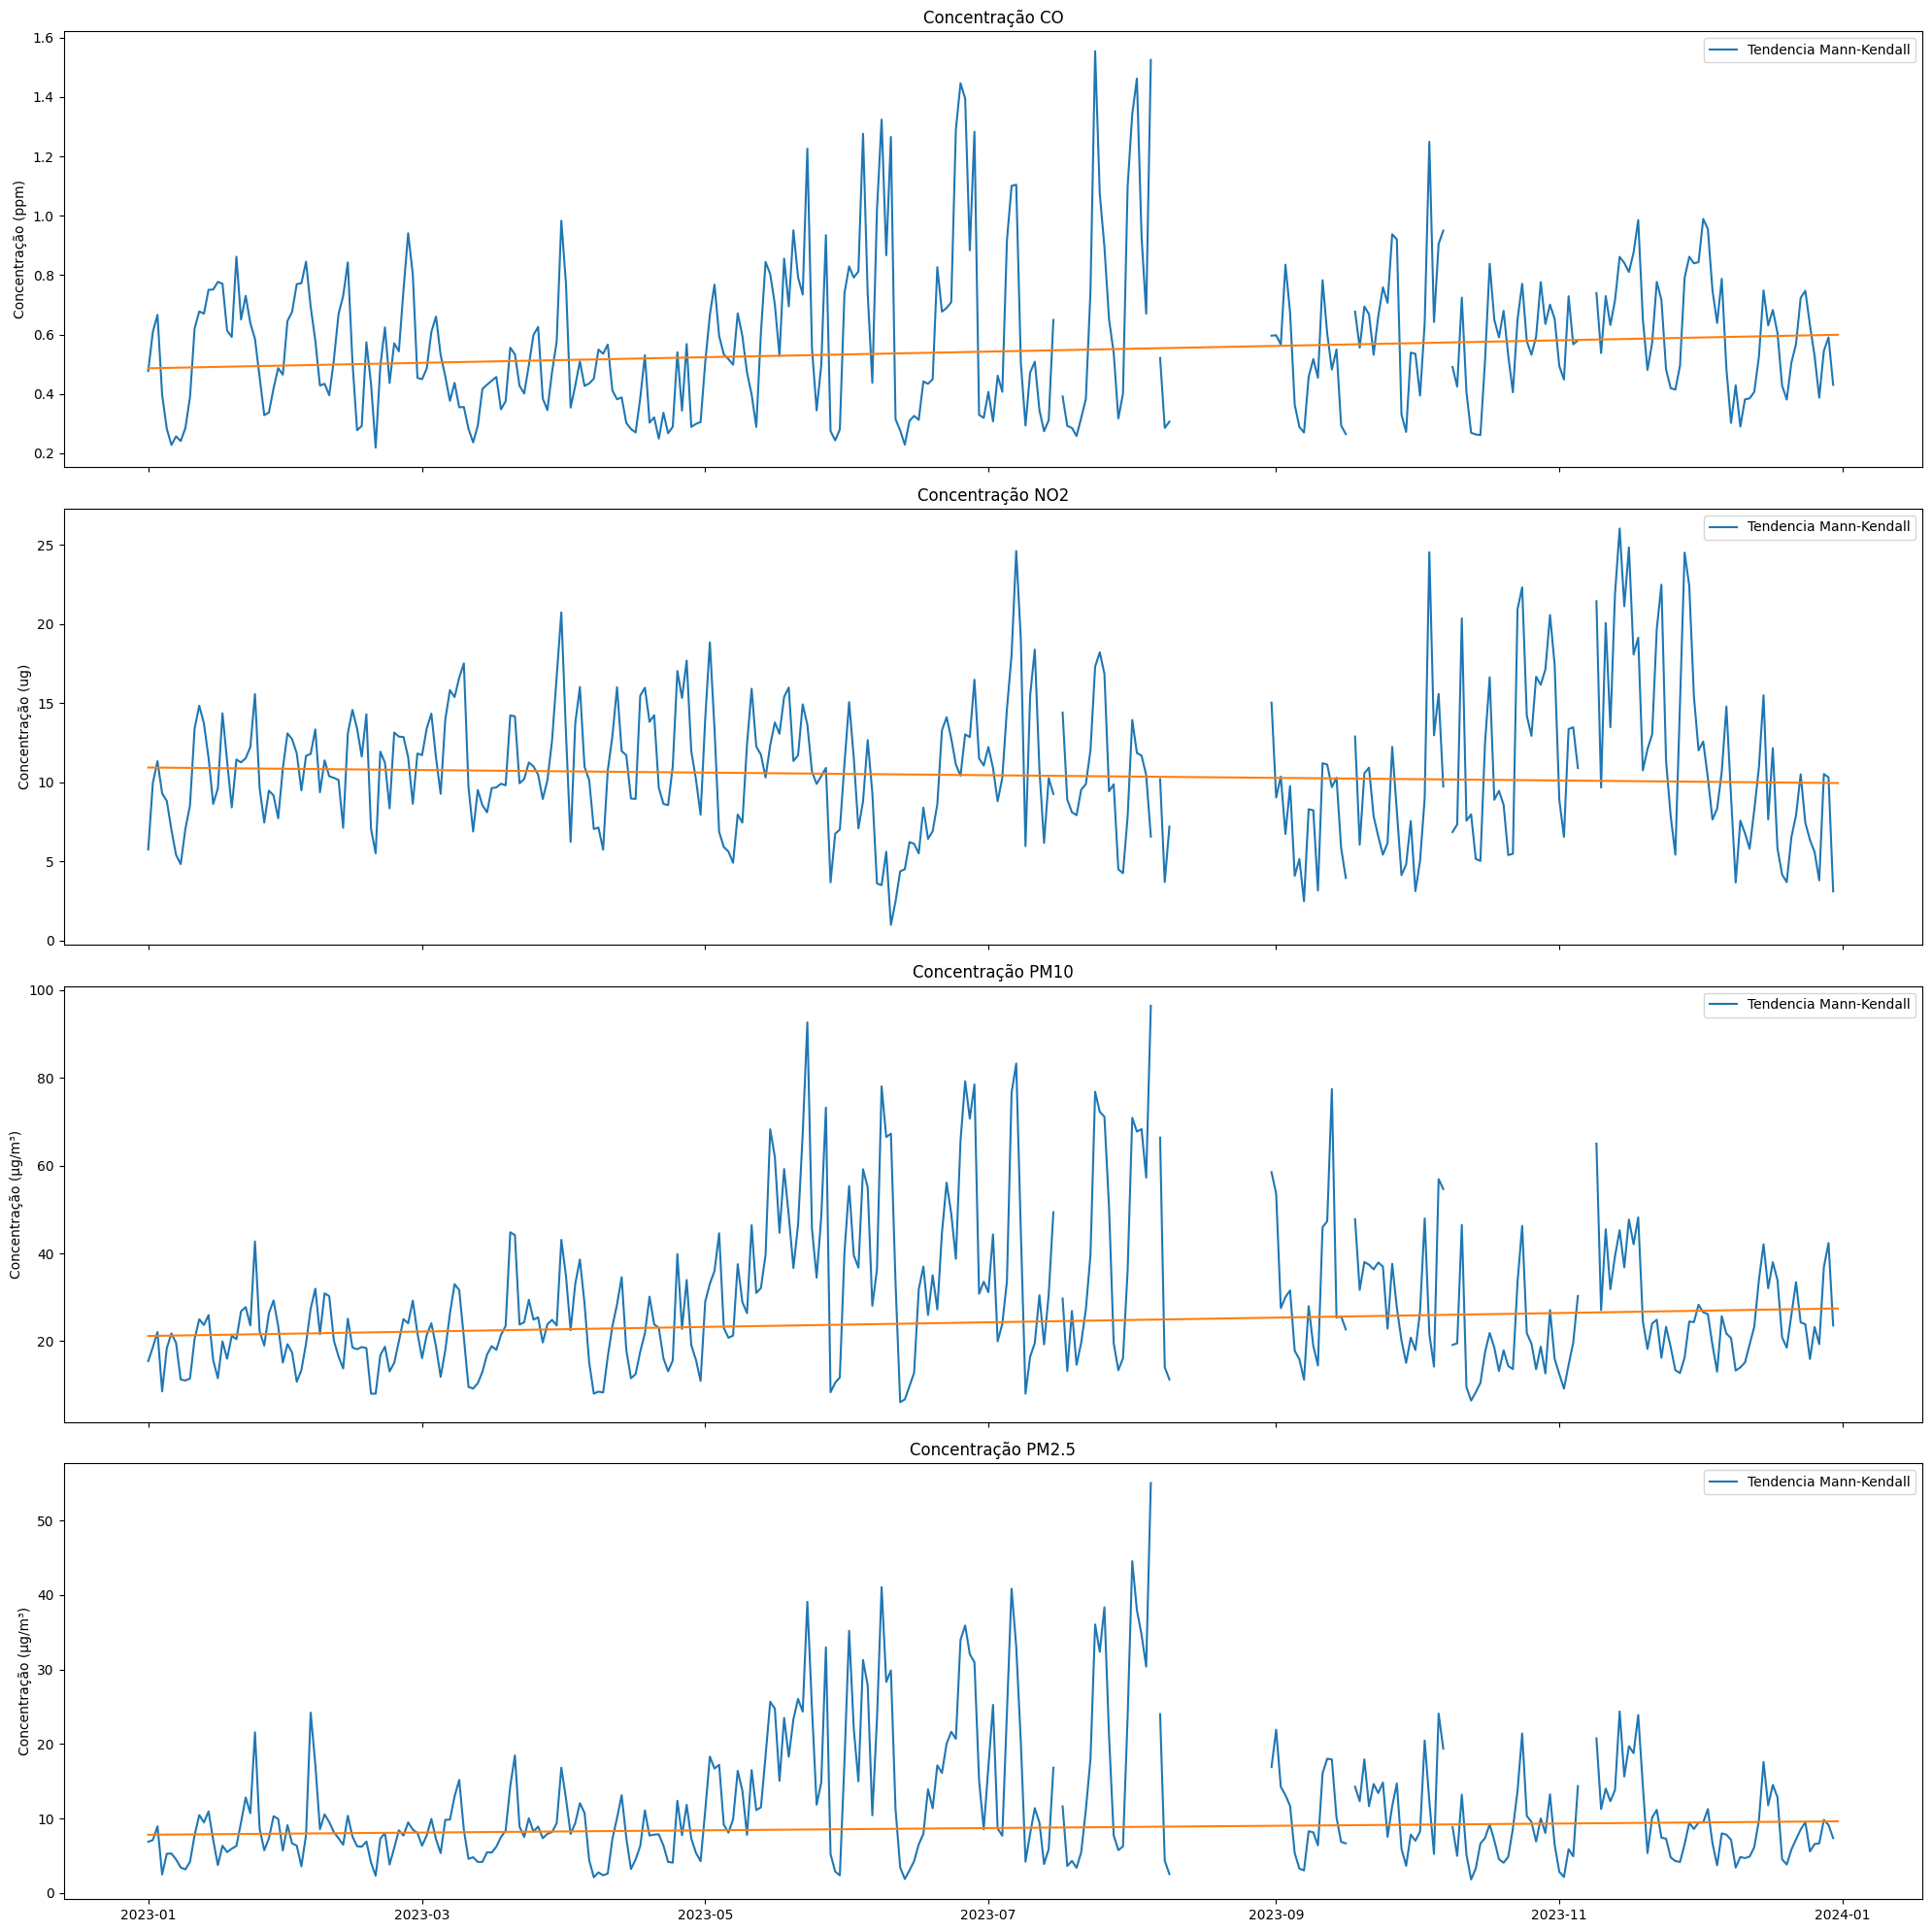

In [163]:
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 20))

for i, (df, title, ylabel, limite, color) in enumerate(data):
    valor_dia = df['Valor'].resample('D').mean()
    res = mk.original_test(valor_dia)
    trend_line = np.arange(len(valor_dia)) * res.slope + res.intercept
    ax[i].plot(valor_dia)
    ax[i].plot(valor_dia.index, trend_line)
    ax[i].set_ylabel(ylabel)
    ax[i].legend([ 'Tendencia Mann-Kendall'])
    ax[i].set_title(title)
    print('Análise \n',title, res,)
plt.tight_layout() 
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\ATV3\kendal_dia.png")
plt.show()

C:\Users\marcos perrude\AppData\Local\Temp\ipykernel_50408\320183173.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  valor_mes = df['Valor'].resample('M').mean()


Análise 
 Concentração CO Mann_Kendall_Test(trend='no trend', h=np.False_, p=np.float64(0.24372228477217428), z=np.float64(1.1657333182503609), Tau=np.float64(0.2727272727272727), s=np.float64(18.0), var_s=212.66666666666666, slope=np.float64(0.009466225452616168), intercept=np.float64(0.5289287774098785))
Análise 
 Concentração NO2 Mann_Kendall_Test(trend='no trend', h=np.False_, p=np.float64(1.0), z=0, Tau=np.float64(0.0), s=np.float64(0.0), var_s=212.66666666666666, slope=np.float64(-0.013993050119675665), intercept=np.float64(11.13775398675613))
Análise 
 Concentração PM10 Mann_Kendall_Test(trend='no trend', h=np.False_, p=np.float64(0.37269149047151817), z=np.float64(0.8914431257208641), Tau=np.float64(0.21212121212121213), s=np.float64(14.0), var_s=212.66666666666666, slope=np.float64(0.5246249601503976), intercept=np.float64(23.225758136233782))
Análise 
 Concentração PM2.5 Mann_Kendall_Test(trend='no trend', h=np.False_, p=np.float64(0.5371338571769022), z=np.float64(0.61715293

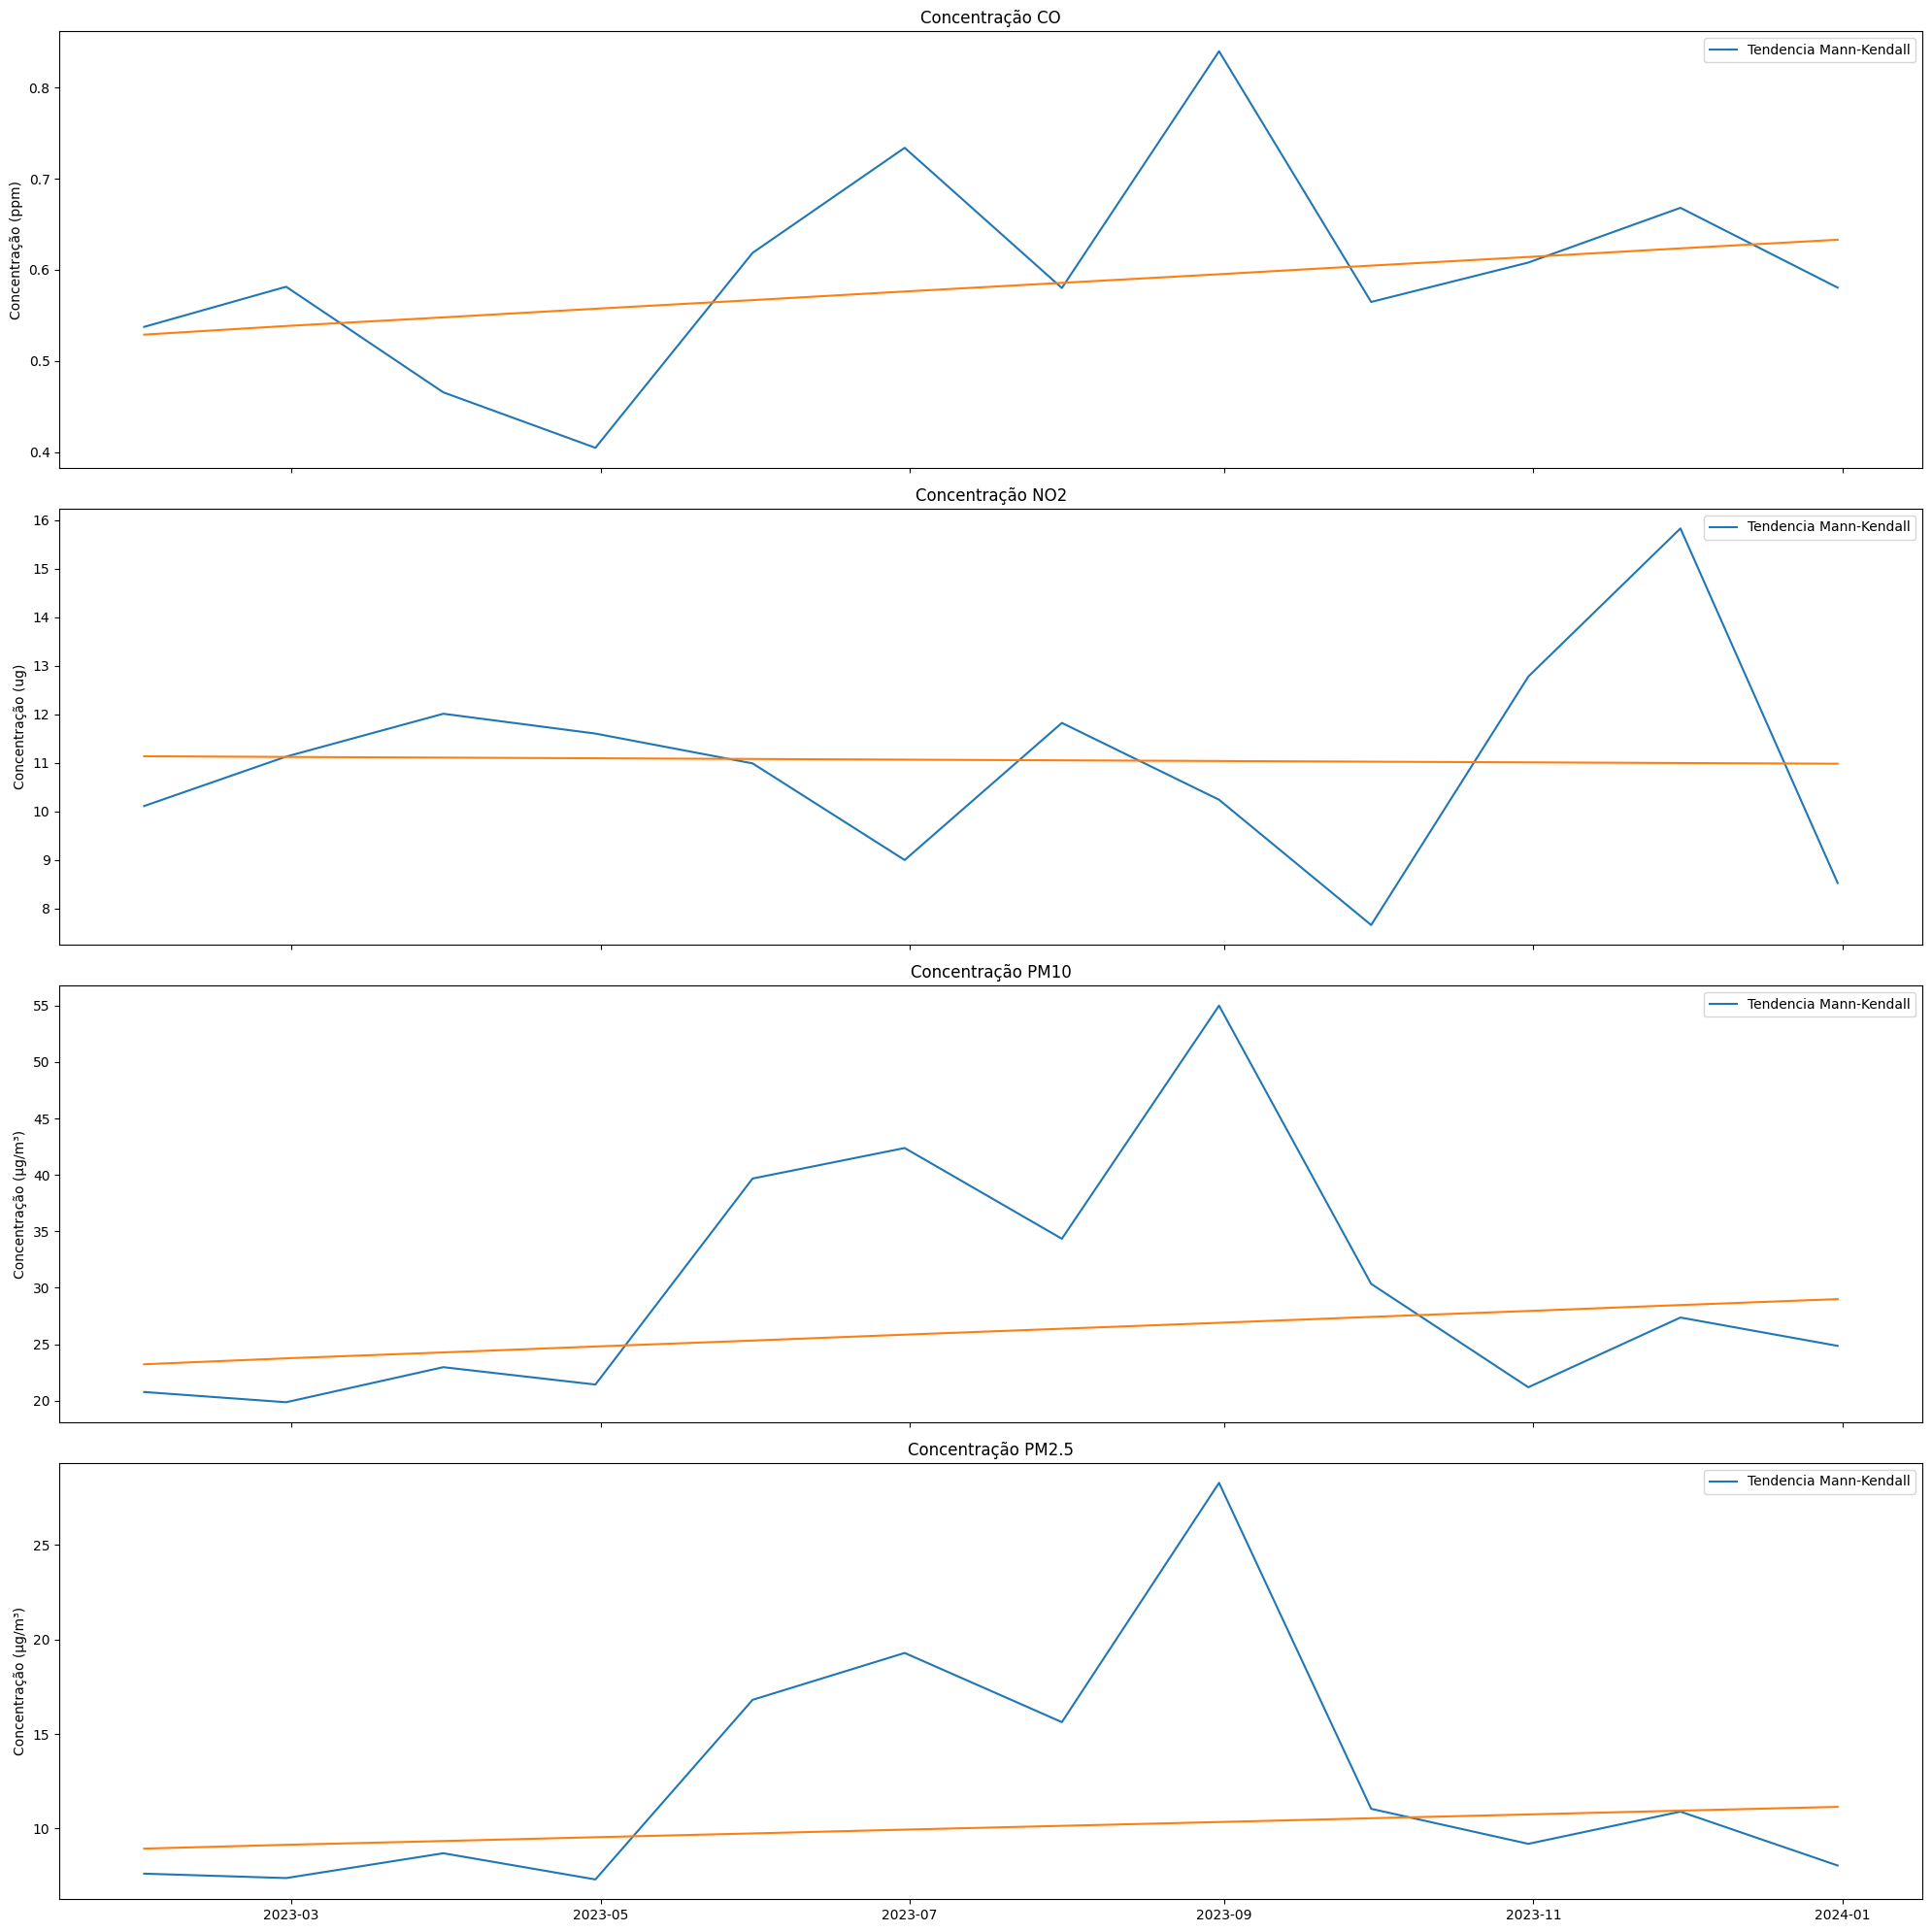

In [164]:
fig, ax = plt.subplots(4, sharex=True, figsize=(20, 20))

for i, (df, title, ylabel, limite, color) in enumerate(data):
    valor_mes = df['Valor'].resample('M').mean()
    res = mk.original_test(valor_mes)
    trend_line = np.arange(len(valor_mes)) * res.slope + res.intercept
    ax[i].plot(valor_mes)
    ax[i].plot(valor_mes.index, trend_line)
    ax[i].set_ylabel(ylabel)
    ax[i].legend([ 'Tendencia Mann-Kendall'])
    ax[i].set_title(title)
    print('Análise \n',title, res,)
plt.tight_layout() 
plt.savefig(r"C:\Users\marcos perrude\Documents\ENS410064\figuras\ATV3\kendal_mes.png")
plt.show()

In [165]:
metar = pd.read_csv(r"C:\Users\marcos perrude\Documents\ENS410064\dados\metar (4).csv")
metar['datetime'] = pd.to_datetime(metar[['day', 'month','year', 'hour']].astype(str).agg('-'.join,axis =1), format = '%d-%m-%Y-%H')
metar = metar.set_index("datetime")

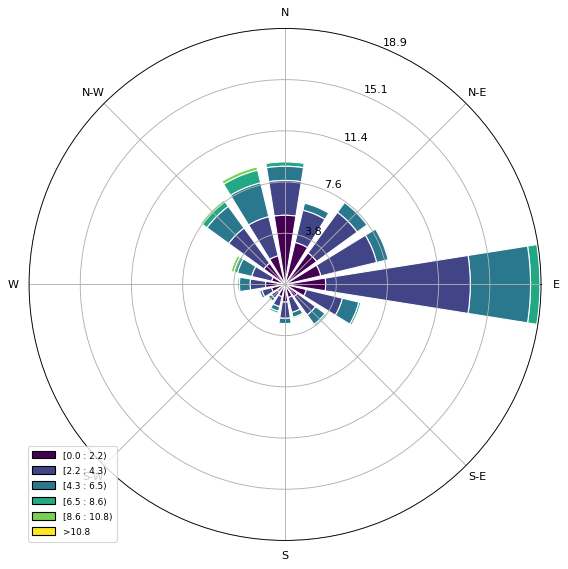

In [166]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes



ax = WindroseAxes.from_ax()
ax.bar(metar['wd'], metar['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

<Axes: xlabel='hour'>

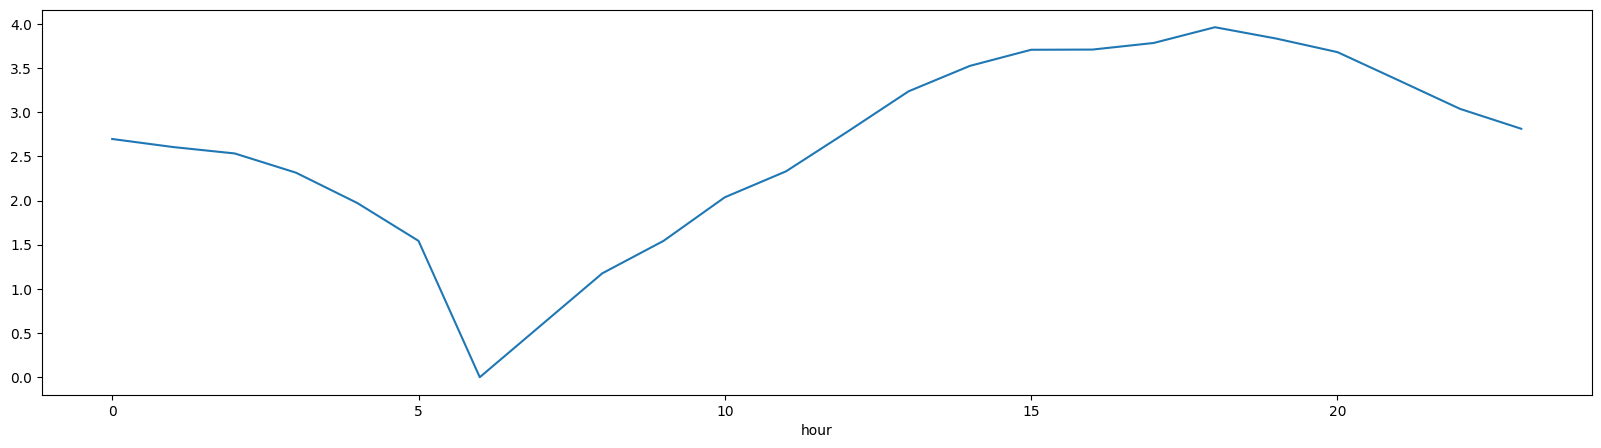

In [167]:
metar.groupby('hour')['ws'].mean().plot(
    figsize=(20,5)
)

<Axes: xlabel='month'>

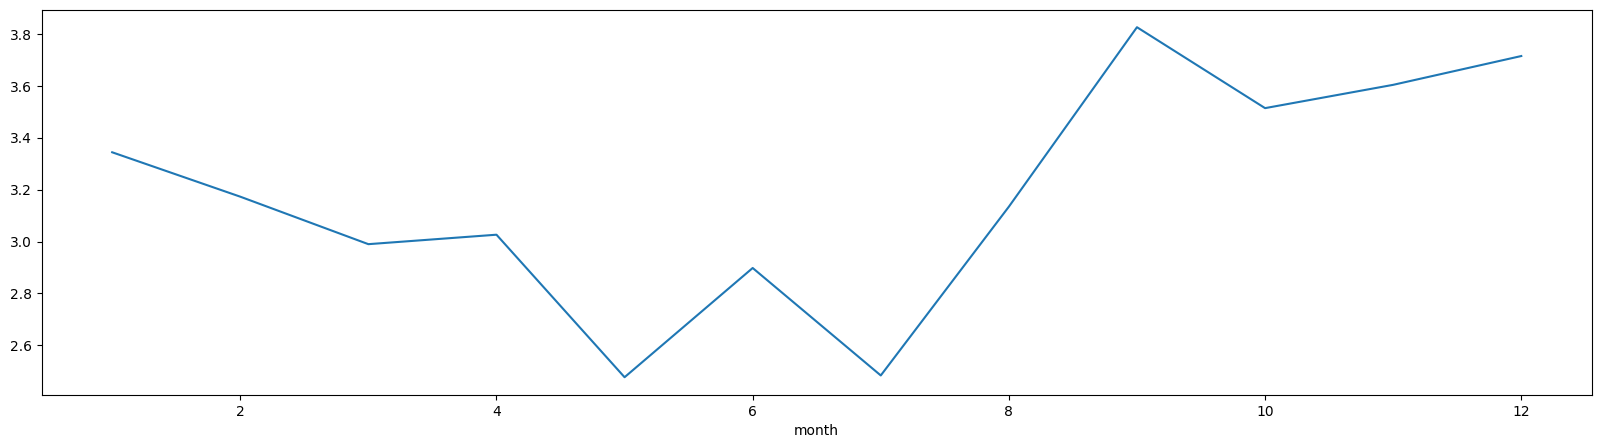

In [168]:
metar.groupby('month')['ws'].mean().plot(
    figsize=(20,5)
)

<Axes: xlabel='month'>

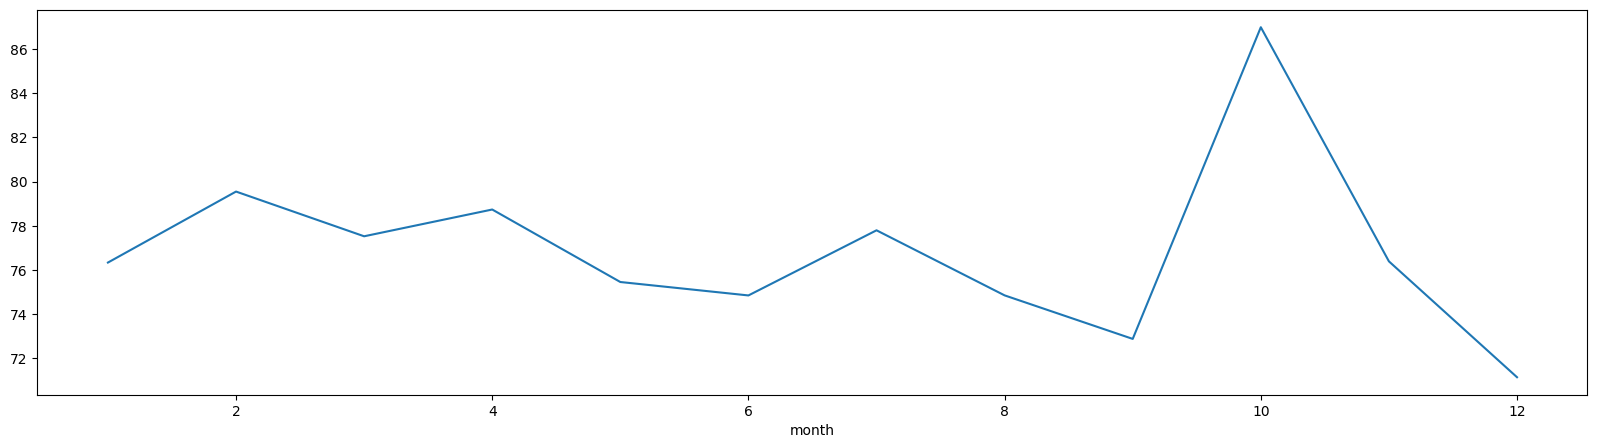

In [169]:
metar.groupby('month')['relh'].mean().plot(
    figsize=(20,5)
)

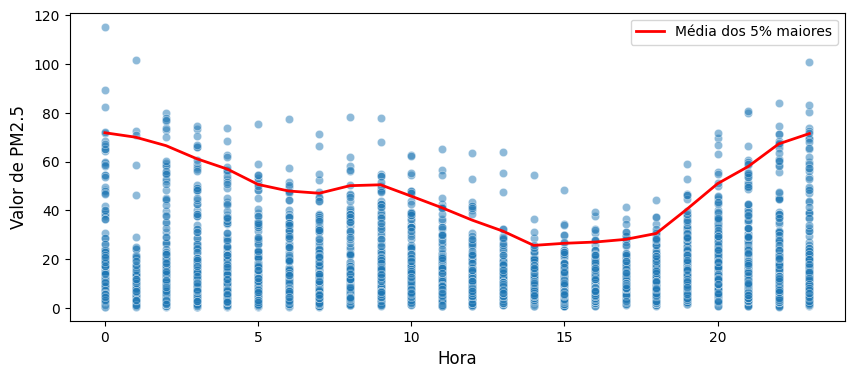

In [170]:
def media5(group):
    top_5_percent = group.quantile(0.95)  # 95º percentil
    filtered = group[group >= top_5_percent]  # Filtra os 5% maiores
    return filtered.mean()  # Retorna a média dos 5% maiores

df_top_5_mean = df_PM25.groupby('Hora')['Valor'].apply(media5).reset_index(name='Media_Top_5')

# Plotando o gráfico
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_PM25, x='Hora', y='Valor', alpha=0.5)
plt.plot(df_top_5_mean['Hora'], df_top_5_mean['Media_Top_5'], color='red', lw=2, label='Média dos 5% maiores')

plt.xlabel('Hora', fontsize=12)
plt.ylabel('Valor de PM2.5', fontsize=12)
plt.legend()
plt.show()

<Axes: xlabel='relh', ylabel='Valor'>

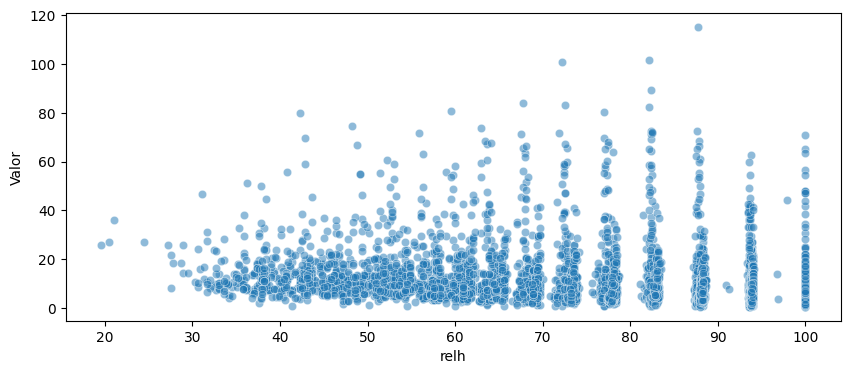

In [171]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_PM25, x=metar['relh'], y='Valor', alpha=0.5)

In [172]:
a = pd.merge(df_PM25, metar, on='datetime', how='inner')
a = a.dropna(subset=['Valor', 'Hora'])

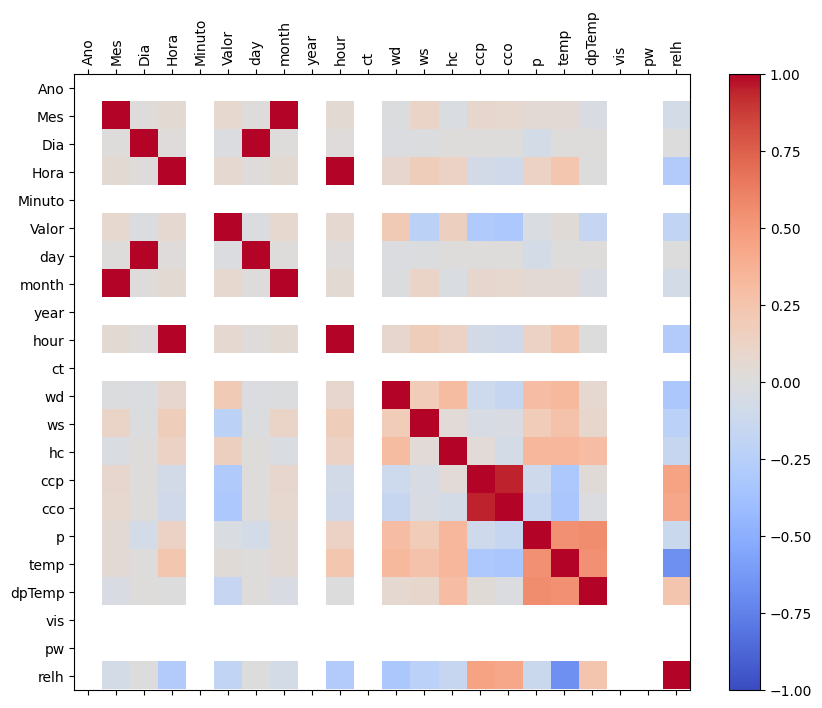

In [173]:
numeric_cols = a.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(numeric_cols.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric_cols.columns, rotation=90)
ax.set_yticklabels(numeric_cols.columns)

plt.show()

Correlação entre Hora e Velocidade do Vento: 0.178
Correlação entre Hora e concetração : -0.226


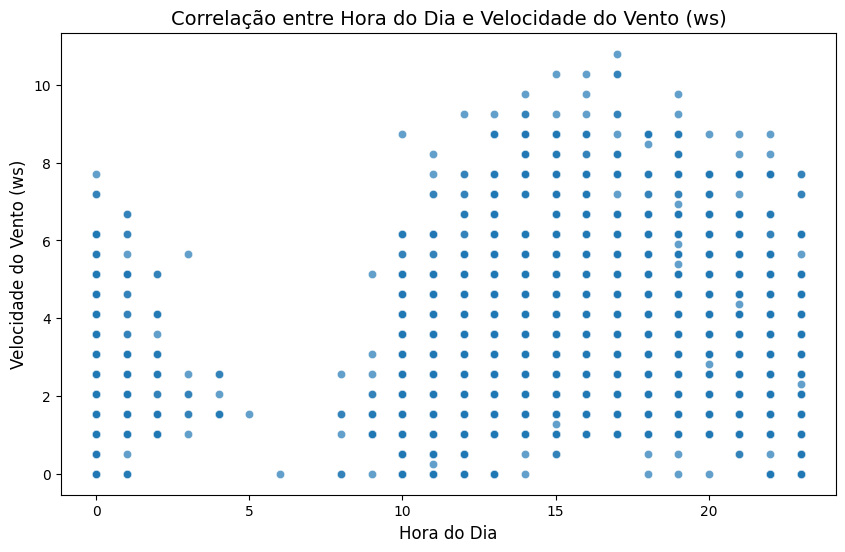

In [174]:
correlacao_ws = pearsonr(a['Hora'], a['ws'])
print(f'Correlação entre Hora e Velocidade do Vento: {correlacao_ws[0]:.3f}')
correlacao_valor = pearsonr(a['Valor'], a['ws'])
print(f'Correlação entre Hora e concetração : {correlacao_valor[0]:.3f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hora', y='ws', data=a, alpha=0.7)
plt.title('Correlação entre Hora do Dia e Velocidade do Vento (ws)', fontsize=14)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Velocidade do Vento (ws)', fontsize=12)
plt.show()

In [175]:
a.columns

Index(['Ano', 'Mes', 'Dia', 'Hora', 'Minuto', 'Estacao', 'Codigo', 'Poluente',
       'Valor', 'Unidade', 'Tipo', 'Testacao', 'Estacao_ano', 'day', 'month',
       'year', 'hour', 'ct', 'wd', 'ws', 'hc', 'ccp', 'cco', 'p', 'temp',
       'dpTemp', 'vis', 'pw', 'relh'],
      dtype='object')

In [176]:
inverno = a.query('Estacao_ano == "Inverno"')

In [177]:
correlacao_inverno_ws = pearsonr(inverno['Hora'], inverno['ws'])
print(f'Correlação entre Hora e Velocidade do Vento mo inverno: {correlacao_inverno_ws[0]:.3f}')
correlacao_inverno_valor = pearsonr(inverno['Valor'], inverno['ws'])
print(f'Correlação entre Hora e concentração no inverno : {correlacao_inverno_valor[0]:.3f}')


Correlação entre Hora e Velocidade do Vento mo inverno: 0.129
Correlação entre Hora e concentração no inverno : -0.315


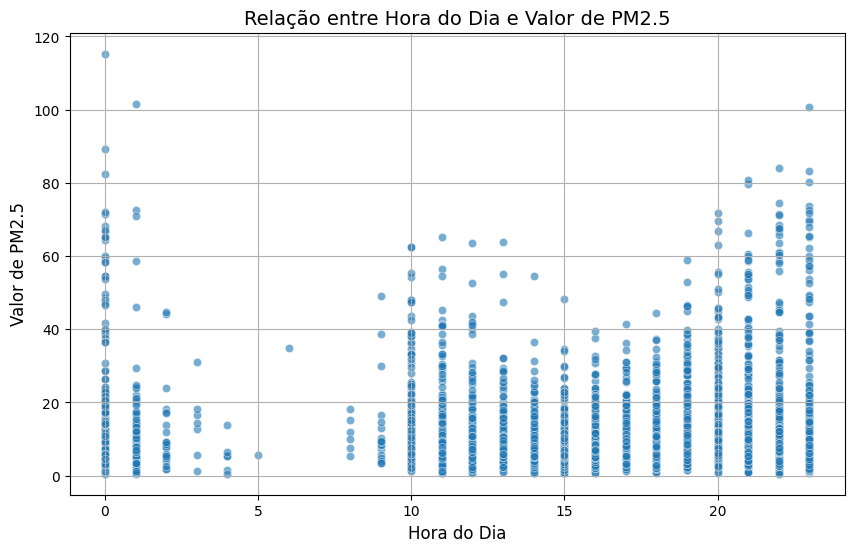

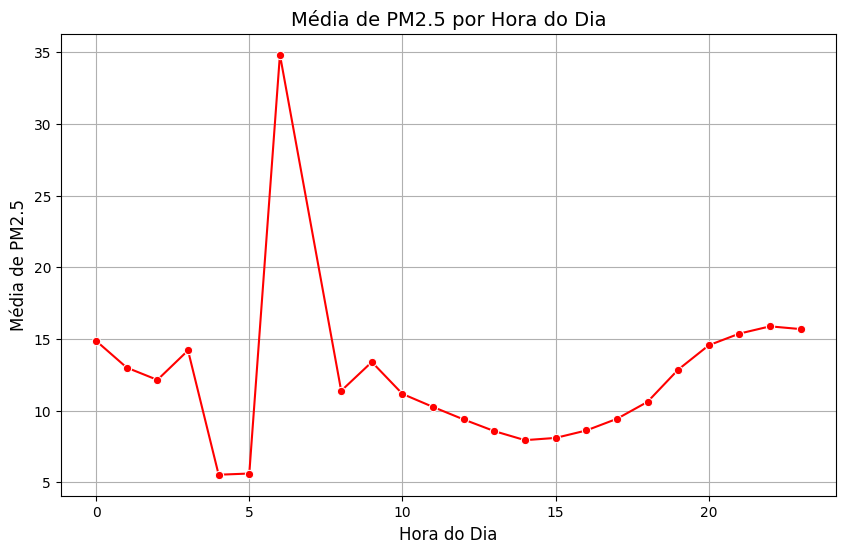

In [178]:
d = a.groupby('Hora')['Valor'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hora', y='Valor', data=a, alpha=0.6)
plt.title('Relação entre Hora do Dia e Valor de PM2.5', fontsize=14)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Valor de PM2.5', fontsize=12)
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Hora', y='Valor', data=d, marker='o', color='red')
plt.title('Média de PM2.5 por Hora do Dia', fontsize=14)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Média de PM2.5', fontsize=12)
plt.grid(True)
plt.show()
